## Keras Regression Cost Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.isnull().sum()
# for this data we have no missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# always do initial describe for any data to get idea of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\Adeer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

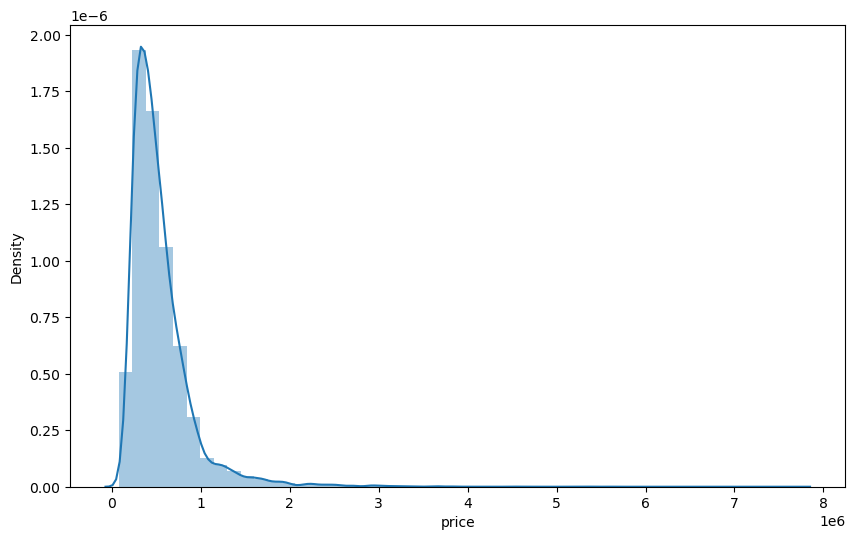

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\Adeer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

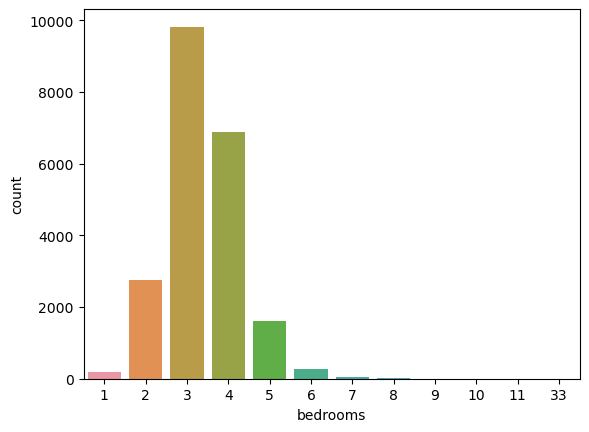

In [11]:
sns.countplot(df['bedrooms'])
# vast majority of houses have 3 to 4 bedrooms

In [14]:
df.corr()['price'].sort_values()
# it looks like that price has high correlation with square feet living area

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

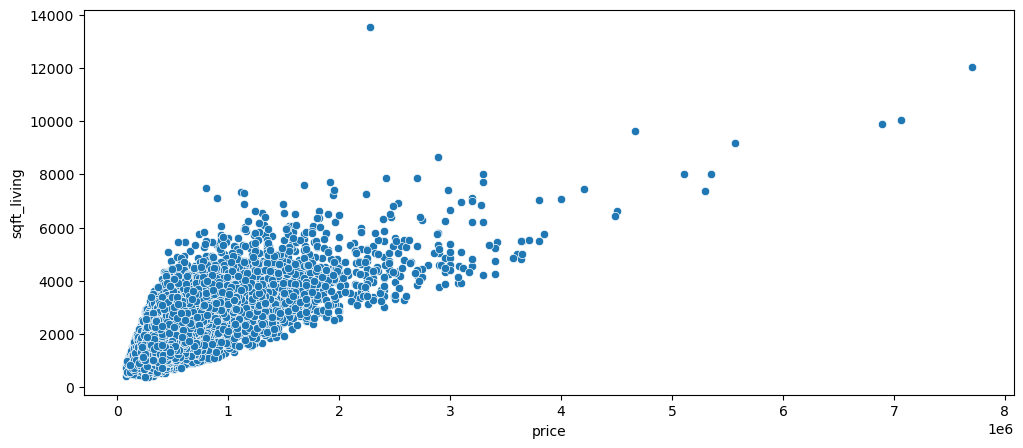

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

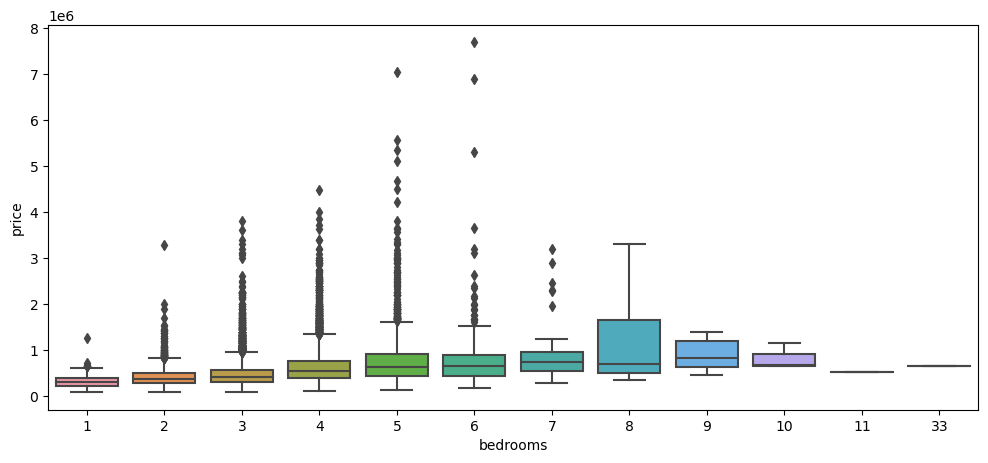

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bedrooms', y='price', data=df)

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='lat'>

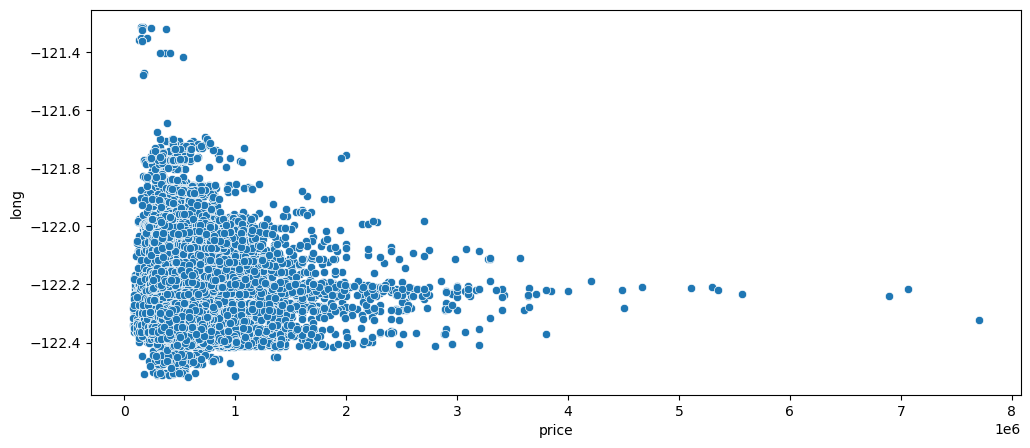

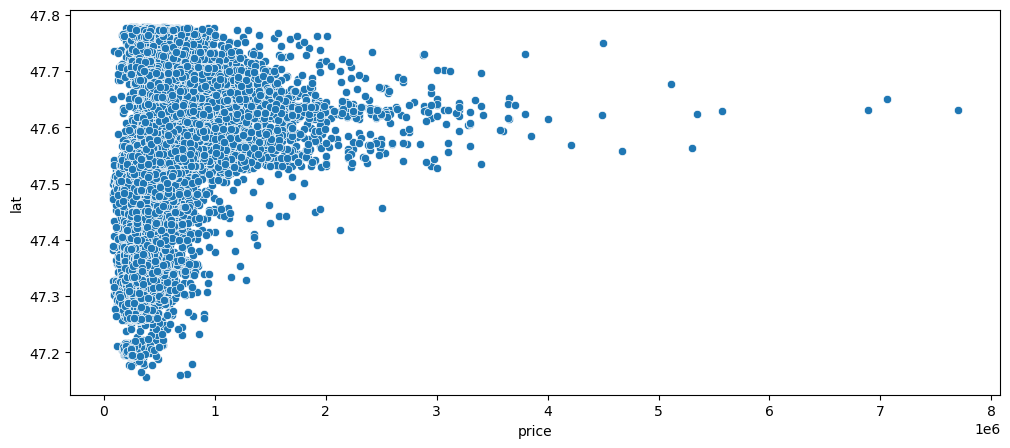

In [24]:
# lets see the distribution of prices per latitude and longitude
plt.figure(figsize=(12,5))
sns.scatterplot(x='price', y='long', data=df)
plt.figure(figsize=(12,5))
sns.scatterplot(x='price', y='lat', data=df)
# at the certain latitude and longitude we can see the expensive houses

<AxesSubplot:xlabel='long', ylabel='lat'>

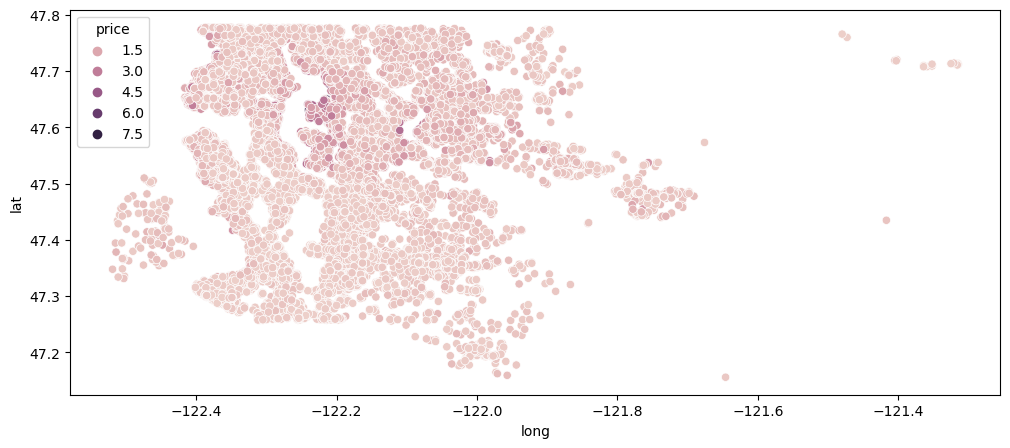

In [27]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='long',y='lat', data=df, hue='price')
# this makes the map of the area with price hotbeds

In [28]:
# lets drop some outliers by dropping the most expensive houses
# these houses are above 3 million
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [32]:
# total houses in the data
# the 1% houses in the data are:
len(df)*0.01

215.97

In [33]:
# now we drop the top 1 percent houses that are highly priced
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

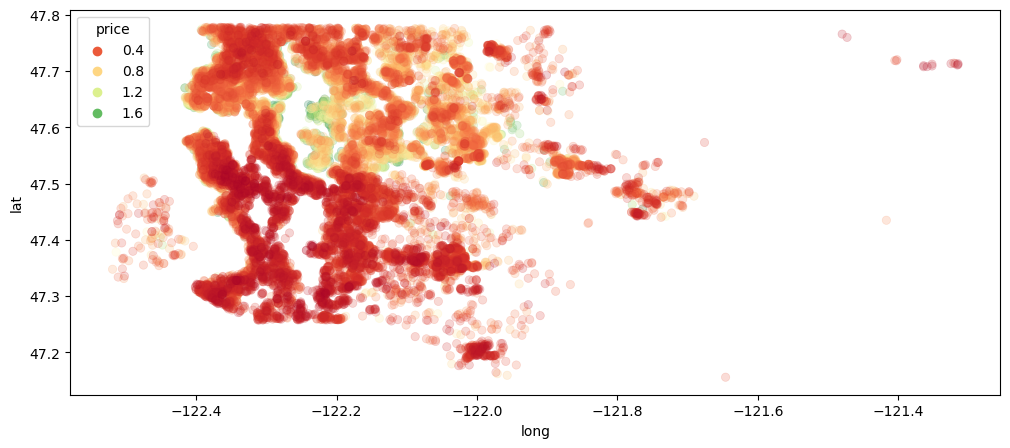

In [38]:
# now we would get a much clearer scatter plot
plt.figure(figsize=(12,5))
sns.scatterplot(x='long',y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')
# this gives much clearer information with 99% of the houses

<AxesSubplot:xlabel='waterfront', ylabel='price'>

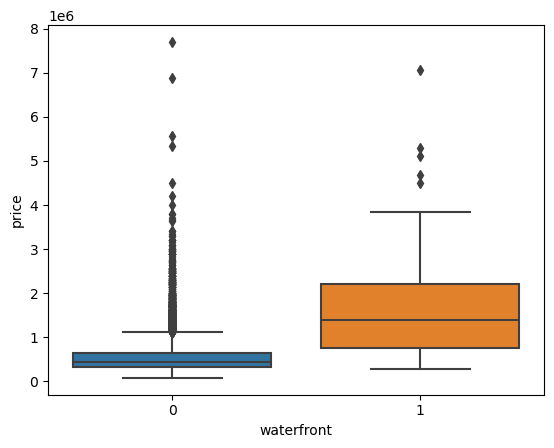

In [39]:
sns.boxplot(x='waterfront',y='price',data=df)
# waterfront houses are most expensive

In [40]:
# lets drop id column as it is of no value
df=df.drop('id',axis=1)

In [41]:
# now we can extract much information from the column
df['date'] = pd.to_datetime(df['date'])

In [47]:
# the lambda expression extracts 
# we are doing feature engineering but extracting extra feature
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [48]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

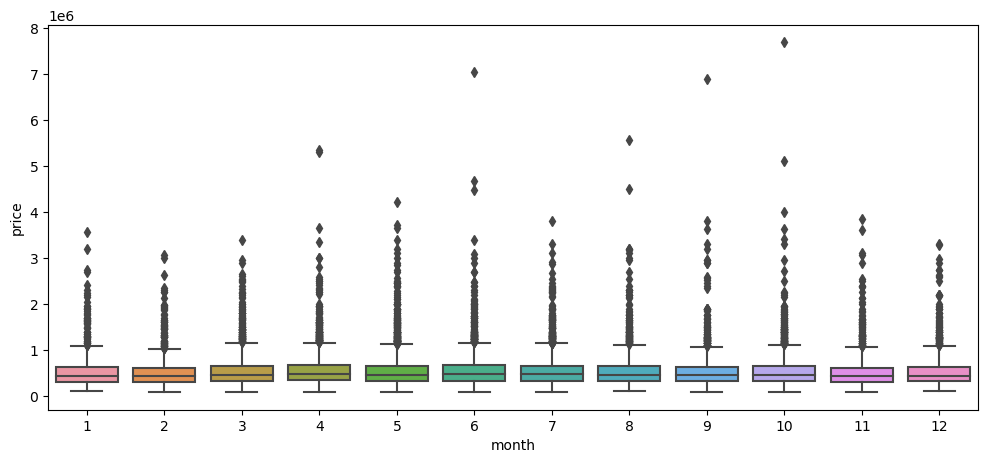

In [50]:
# now lets see the prices on month basis
plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

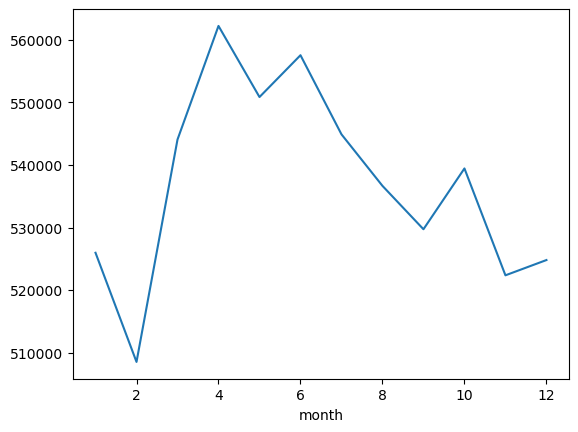

In [52]:
df.groupby('month').mean()['price'].plot()
# some behaviour in months

<AxesSubplot:xlabel='year'>

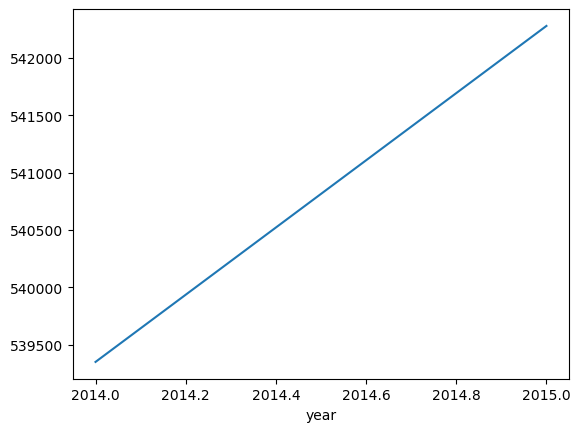

In [53]:
df.groupby('year').mean()['price'].plot()
# some behaviour in months

In [54]:
# date column is no longer useful
df = df.drop('date', axis=1)

In [55]:
df.head()
# notice that zipcode will cause some issue in model as it might not develop a relationship
# therefore this might be a categorical variable

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [56]:
df['zipcode'].value_counts()
# we have 70 categories, which is too much to make categorical variables

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [57]:
df = df.drop('zipcode',axis=1)

In [60]:
df['yr_renovated'].value_counts()
# lets think in the way that the more recently it is renovated, the better it is
# this will always not be case, but this is lucky case

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [62]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

### Data Processing and Model Creation

In [63]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler =MinMaxScaler()

In [69]:
# transforming and scaling in one step
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
X_train.shape
# we have 19 incoming features, so 19 neurons in layer

(15117, 19)

In [76]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss ='mse')

In [77]:
# using the validation data we are going to be checking to prevent overfitting
# in larger data sets we are going to be feeding in batch_sizes=128
model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 430237745152.0000 - val_loss: 418907422720.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428989677568.0000 - val_loss: 414723538944.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 410938638336.0000 - val_loss: 375362551808.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 323046703104.0000 - val_loss: 243245154304.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 166478839808.0000 - val_loss: 113078870016.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 101529657344.0000 - val_loss: 96131735552.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97407787008.0000 - val_loss: 94010785792.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95698026496.0000 - val_loss: 92703473664.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 37551407104.0000 - val_loss: 42459131904.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 37401944064.0000 - val_loss: 41439150080.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37243232256.0000 - val_loss: 42005041152.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37119221760.0000 - val_loss: 40512581632.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36991070208.0000 - val_loss: 40781201408.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36845211648.0000 - val_loss: 40852017152.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36649435136.0000 - val_loss: 41587412992.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 36540280832.0000 - val_loss: 39485390848.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32850802688.0000 - val_loss: 35177271296.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32822292480.0000 - val_loss: 35442061312.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32803192832.0000 - val_loss: 34999431168.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32755619840.0000 - val_loss: 33802031104.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32768976896.0000 - val_loss: 34229266432.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32710598656.0000 - val_loss: 36894085120.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32695687168.0000 - val_loss: 35071053824.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32655951872.0000 - val_loss: 34168299520.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31386474496.0000 - val_loss: 34928553984.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31369250816.0000 - val_loss: 33553125376.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31337816064.0000 - val_loss: 33783410688.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31314636800.0000 - val_loss: 34395316224.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31311104000.0000 - val_loss: 32791197696.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 31291680768.0000 - val_loss: 33239715840.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31259826176.0000 - val_loss: 33982504960.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31252027392.0000 - val_loss: 35599425536.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 30538405888.0000 - val_loss: 32985409536.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30557313024.0000 - val_loss: 33640957952.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30529828864.0000 - val_loss: 32900073472.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30526578688.0000 - val_loss: 33867698176.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30520840192.0000 - val_loss: 34753097728.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30536994816.0000 - val_loss: 34335352832.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30499762176.0000 - val_loss: 34043684864.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30491602944.0000 - val_loss: 33879627776.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29996611584.0000 - val_loss: 33379231744.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 29986084864.0000 - val_loss: 33636632576.0000
Epoch 335/400
119/119 [==============================] - 0s 4ms/step - loss: 30005811200.0000 - val_loss: 34873192448.0000
Epoch 336/400
119/119 [==============================] - 0s 4ms/step - loss: 30002948096.0000 - val_loss: 35608092672.0000
Epoch 337/400
119/119 [==============================] - 0s 4ms/step - loss: 29990688768.0000 - val_loss: 33863841792.0000
Epoch 338/400
119/119 [==============================] - 1s 4ms/step - loss: 29944649728.0000 - val_loss: 34345547776.0000
Epoch 339/400
119/119 [==============================] - 0s 4ms/step - loss: 29938128896.0000 - val_loss: 33927241728.0000
Epoch 340/400
119/119 [==============================] - 0s 4ms/step - loss: 29950330880.0000 - val_loss: 34003941376.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29480134656.0000 - val_loss: 34095067136.0000
Epoch 400/400
119/119 [==============================] - 1s 4ms/step - loss: 29558192128.0000 - val_loss: 35379560448.0000


### Model Evaluation and Predictions

In [80]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

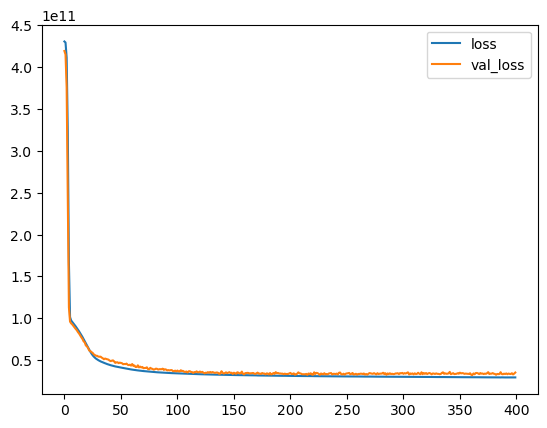

In [82]:
losses.plot()
# blue is the training loss and orange is validation loss
# higher spikes would indicate that we are overfitting data
# this is the perfect behaviour, 

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [84]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [93]:
print('Mean Squared Error:       ' + str(mean_squared_error(y_test,predictions)))
print('Root Mean Squared Error:  ' + str((mean_squared_error(y_test,predictions)**0.5)))
print('Mean Absolute Error:      ' + str(mean_absolute_error(y_test,predictions)))


Mean Squared Error:       35379560993.35157
Root Mean Squared Error:  188094.55333249705
Mean Absolute Error:      114067.90397497106


In [94]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [95]:
5.402966e+05
# we are getting mean 5.4 million, while our mean absolute error is 1.1 million
# error is 25% of the mean, this is not great, but also not too bad

540296.6

In [97]:
explained_variance_score(y_test, predictions)
# press shift+tab at the above function
# best possible score is 1.0

0.7786154584974543

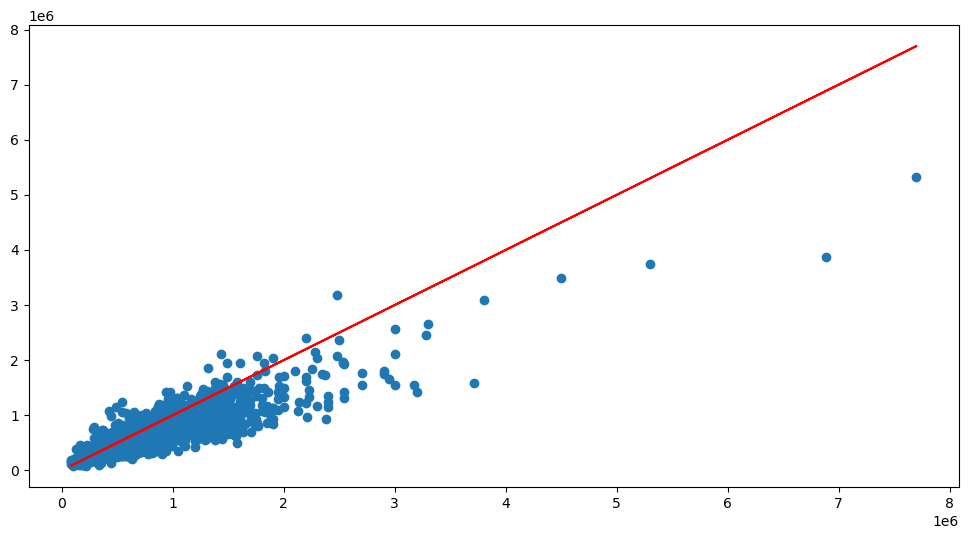

In [99]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
# the red line is the best fit line
# clearly we are seeing a good fit for the data

### Predicting for Brand New Data

In [101]:
single_house = df.drop('price',axis=1).iloc[0]
# this is a new house for example, now we need to decide on what price should it sell
# now we need to scale it

In [106]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [107]:
model.predict(single_house)

1/1 [==============================] - 0s 22ms/step


array([[239993.39]], dtype=float32)

In [ ]:
# the above price is the predicted price for this house

### This concludes this Project